In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [3]:
#load dataset
train_dataset = train_datagen.flow_from_directory('ProjectImage/Sobel/train',
                                                  target_size=(180, 180),
                                                  batch_size=32,
                                                  class_mode='categorical')

val_dataset = validation_datagen.flow_from_directory('ProjectImage/Sobel/val',
                                                     target_size=(180, 180),
                                                     batch_size=32,
                                                     class_mode='categorical')

test_dataset = test_datagen.flow_from_directory('ProjectImage/Sobel/val',
                                                target_size=(180, 180),
                                                batch_size=32,
                                                shuffle=False,
                                                class_mode='categorical')

Found 1596 images belonging to 2 classes.
Found 404 images belonging to 2 classes.
Found 404 images belonging to 2 classes.


In [4]:
# Get the class labels and their corresponding indices from the train dataset
classes_train = train_dataset.class_indices

In [5]:
# Print the classes
print("Classes in the train dataset:")
for class_name, class_index in classes_train.items():
    print(f"Class index: {class_index} - Class name: {class_name}")

Classes in the train dataset:
Class index: 0 - Class name: NORMAL
Class index: 1 - Class name: PNEUMONIA


In [6]:
# One-hot encode train and validation labels
from tensorflow.keras.utils import to_categorical
num_classes = 3  # Assuming you have 3 classes
one_hot_train_labels = to_categorical(train_dataset.labels, num_classes=num_classes)
one_hot_validation_labels = to_categorical(val_dataset.labels, num_classes=num_classes)

In [7]:
# Get some sample images and their corresponding labels
sample_images, sample_labels = next(train_dataset)

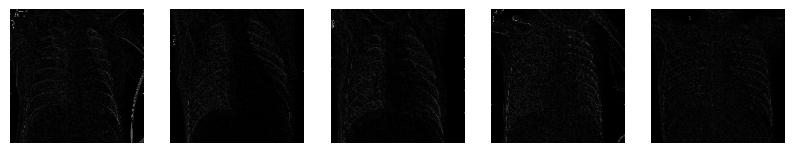

In [8]:
import matplotlib.pyplot as plt
# Define a function to display images
def display_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

# Display some sample images
display_images(sample_images, sample_labels)

In [9]:
# Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # Output layer with 7 units for 7 classes
])

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

In [12]:
# Training the model
CNN_FOOD_CHOSEN = model.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=10,
                              batch_size=32)

Epoch 1/10


50/50 [==============================] - 49s 952ms/step - loss: 0.3531 - accuracy: 0.8590 - val_loss: 0.2100 - val_accuracy: 0.9332
Epoch 2/10
50/50 [==============================] - 36s 726ms/step - loss: 0.1459 - accuracy: 0.9499 - val_loss: 0.1263 - val_accuracy: 0.9554
Epoch 3/10
50/50 [==============================] - 36s 721ms/step - loss: 0.0769 - accuracy: 0.9718 - val_loss: 0.1911 - val_accuracy: 0.9381
Epoch 4/10
50/50 [==============================] - 36s 722ms/step - loss: 0.0522 - accuracy: 0.9806 - val_loss: 0.1669 - val_accuracy: 0.9604
Epoch 5/10
50/50 [==============================] - 36s 725ms/step - loss: 0.0294 - accuracy: 0.9893 - val_loss: 0.2182 - val_accuracy: 0.9530
Epoch 6/10
50/50 [==============================] - 36s 727ms/step - loss: 0.0114 - accuracy: 0.9975 - val_loss: 0.2395 - val_accuracy: 0.9604
Epoch 7/10
50/50 [==============================] - 36s 725ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.2594 - val_accuracy: 0.96

In [13]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


13/13 [==============================] - 5s 342ms/step - loss: 0.1974 - accuracy: 0.9703
Test Loss: 0.19743245840072632
Test Accuracy: 0.9702970385551453


In [14]:
# Predict the labels for the test dataset
test_predictions = model.predict(test_dataset)
predicted_classes = np.argmax(test_predictions, axis=1)

13/13 [==============================] - 5s 339ms/step


In [15]:
# Ensure true classes are correctly aligned
true_classes =test_dataset.classes

In [16]:
# Verify the lengths of predictions and true labels match
assert len(predicted_classes) == len(true_classes), "Mismatch between predicted and true label counts"

In [17]:
# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[191  11]
 [  1 201]]


<Figure size 1000x1000 with 0 Axes>

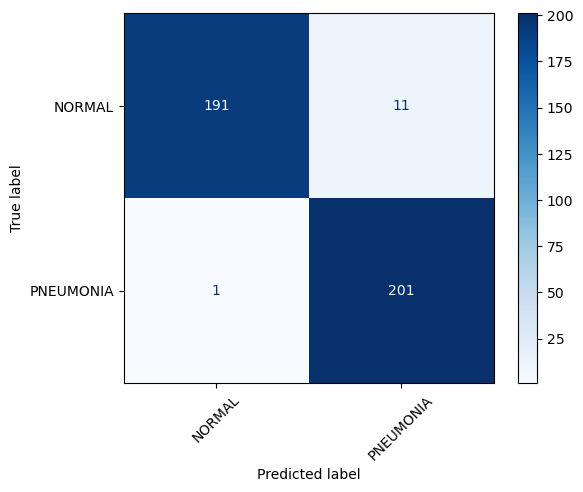

In [18]:
# Display the confusion matrix
plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_dataset.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()

In [19]:
# Compute the classification report including the F1-score
report = classification_report(true_classes, predicted_classes, target_names=list(test_dataset.class_indices.keys()))
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.99      0.95      0.97       202
   PNEUMONIA       0.95      1.00      0.97       202

    accuracy                           0.97       404
   macro avg       0.97      0.97      0.97       404
weighted avg       0.97      0.97      0.97       404

